In [1]:
%run ../../bin/imports.ipynb

## Analyzing TMT results

In [2]:
sherpa_cutoff = 0.1

Import data and get HLA types

In [3]:
tissue_msb_dict = {'DNA_1070865FA1-5013': 'MSB8405PAIR2MS2TMT.raw', 
                   'DNA_1183384FA1-5013': 'MSB46732n46733A.raw', 
                   'DNA_1134036FA1-5013': 'MSB46734n46735A.raw',
                   'DNA_124768F-5013': 'MSB46736n46737A.raw', 
                   'DNA_30686F-5013': 'MSB46738n46739A.raw',
                  'DNA_H2009': 'MSB-9251_PAIR1.raw',
                  'DNA_54147': 'MSB-9251_PAIR2.raw'}

tissue_order = list(tissue_msb_dict.keys())
tissue = tissue_order[0]

In [4]:
sample_letter_map = pd.DataFrame({'Sample': ['DNA_1070865FA1-5013',
                                            'DNA_1183384FA1-5013', 'DNA_1134036FA1-5013', 'DNA_124768F-5013',
                                           'DNA_30686F-5013', 'DNA_H2009', 'DNA_54147'],
                                  'Tissue': ['1070865FA1',
                                            '1183384FA1', '1134036FA1', '124768F',
                                           '30686F', 'H2009', '54147'],
                                 'Tissue_letter': ['M', 'N', 'O', 'C', 'P', 'CellLine', 'Q']})

Confirming LOH

In [5]:
output_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/pancancer.dash_output.csv', index_col=0)
output_cell_line_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.immunopeptidomics_cell_line.dash_output.csv')

output_df = pd.concat([output_df, output_cell_line_df], sort=True)
output_df['gene'] = output_df['hla_locus']

In [6]:
output_df[(output_df['Sample'].isin(tissue_order))][['Sample', 'dash_allele', 'purity',
                                                                'dash_r', 'prediction_probability', 'dash_deletion']]

,Sample,dash_allele,purity,dash_r,prediction_probability,dash_deletion
0,DNA_54147,hla_a_03_01_01_01,0.80,1.2832544082591297,0.996365,False
1,DNA_54147,hla_a_02_01_01_01,0.80,0.08893851830163127,0.996365,True
2,DNA_54147,hla_b_07_02_01,0.80,1.2852207362043069,0.996365,False
3,DNA_54147,hla_b_40_02_01,0.80,0.10417378556205548,0.996365,True
4,DNA_54147,hla_c_02_02_02,0.80,0.08958876790183208,0.996365,True
5,DNA_54147,hla_c_07_02_01_01,0.80,1.2121310700528591,0.996365,False
0,DNA_124768F-5013,hla_a_25_01_01,0.23,0.6339447508104947,0.993663,True
1,DNA_124768F-5013,hla_a_24_02_01_01,0.23,1.7644244627809802,0.993663,False
2,DNA_124768F-5013,hla_b_38_01_01,0.23,1.6827887259284153,0.991004,False
3,DNA_124768F-5013,hla_b_18_01_01_01,0.23,0.600105028866404,0.991004,True


### Run through binding predictions

Raw data, pre-processing and separation: <br>
/rnd/users/mp-wsrv-hmc01/dash-validation/comparative-proteomics/TMT-19MAR2020/peptide_with_TMTQuant.csv <br>
/rnd/users/mp-wsrv-hmc01/dash-validation/comparative-proteomics/TMT-09APR2021/peptide_with_TMTQuant.csv

In [7]:
def format_hla(x):
    return 'HLA-{0}{1}:{2}'.format(x.split('_')[1].upper(),x.split('_')[2], x.split('_')[3])

In [8]:
all_dfs = []
for tissue in tissue_order:
    print(tissue)
    tmp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/validation/TMT/peaks/raw/{0}.out.csv'.format(tissue))
    all_dfs.append(tmp_df)


DNA_1070865FA1-5013
DNA_1183384FA1-5013
DNA_1134036FA1-5013
DNA_124768F-5013
DNA_30686F-5013
DNA_H2009
DNA_54147


In [9]:
AAList = list(string.ascii_uppercase)
def get_peptide(peptide):
    pepSeq = [item for item in peptide if item in AAList]
    pepSeq = "".join(pepSeq)
    return pepSeq

unique_peptide_counts, nine_mer_peptide_counts = [], []
all_dfs_filtered = []
for df in all_dfs:
    df['Sequence'] = df.Peptide.apply(get_peptide)
    df = df[df.has_good_signal == 'Y']
    df['Sequence_length'] = df.Sequence.str.len()
    df = df[(df.Sequence_length > 7) & (df.Sequence_length < 12)]
    all_dfs_filtered.append(df)
    unique_peptide_counts.append(len(df.Sequence.unique()))
    nine_mer_peptide_counts.append(len(df[df.Sequence.str.len() == 9].Sequence.unique()))

pep_counts_df = pd.DataFrame({'Tissue': tissue_order, 'Unique Peptides': unique_peptide_counts,
                             'Unique 9-mer Peptides': nine_mer_peptide_counts})
pep_counts_df['Tissue'] = pep_counts_df['Tissue'].str.split('_').str[1].str.split('-').str[0]



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
pep_counts_df = pd.merge(pep_counts_df, sample_letter_map,
                        on='Tissue', how='left')

In [11]:
pep_counts_df

,Tissue,Unique Peptides,Unique 9-mer Peptides,Sample,Tissue_letter
0,1070865FA1,8319,5245,DNA_1070865FA1-5013,M
1,1183384FA1,4762,3285,DNA_1183384FA1-5013,N
2,1134036FA1,3135,2143,DNA_1134036FA1-5013,O
3,124768F,6196,4309,DNA_124768F-5013,C
4,30686F,4444,2883,DNA_30686F-5013,P
5,H2009,5546,3321,DNA_H2009,CellLine
6,54147,1039,680,DNA_54147,Q


In [12]:
pep_counts_df['Unique Peptides'].mean()

4777.285714285715

In [13]:
pep_counts_df['Unique Peptides'].median()

4762.0

In [14]:
pep_counts_df['Fraction 9-mer'] = pep_counts_df['Unique 9-mer Peptides'] / pep_counts_df['Unique Peptides']

In [15]:
pep_counts_df['Fraction 9-mer'].mean()

0.6573381664466889

In [16]:
pep_counts_df['Fraction 9-mer'].median()

0.6544754571703562

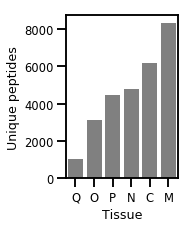

In [17]:
plt.figure(figsize=(2, 3))
sns.set_context('talk', font_scale=0.7)
sns.barplot(x='Tissue_letter', y='Unique Peptides', 
            data=pep_counts_df[pep_counts_df.Tissue_letter != 'CellLine'].sort_values('Unique Peptides'), color='grey')
#plt.xticks(rotation=90)
plt.xlabel('Tissue')
plt.ylabel('Unique peptides')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.unique_peps.bar.pdf',
           bbox_inches='tight')

In [18]:
pep_counts_df[pep_counts_df.Tissue_letter != 'CellLine'].sort_values('Unique Peptides')

,Tissue,Unique Peptides,Unique 9-mer Peptides,Sample,Tissue_letter,Fraction 9-mer
6,54147,1039,680,DNA_54147,Q,0.654475
2,1134036FA1,3135,2143,DNA_1134036FA1-5013,O,0.683573
4,30686F,4444,2883,DNA_30686F-5013,P,0.648740
1,1183384FA1,4762,3285,DNA_1183384FA1-5013,N,0.689836
3,124768F,6196,4309,DNA_124768F-5013,C,0.695449
0,1070865FA1,8319,5245,DNA_1070865FA1-5013,M,0.630484


In [19]:
# Saving source data
panel_name = 'supp_figure_13a'
pep_counts_df[pep_counts_df.Tissue_letter != 'CellLine'].sort_values('Unique Peptides')[['Tissue', 'Tissue_letter', 'Unique Peptides']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

In [20]:
bpseq_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.immunopeptidomics_bpseq.tab',
                       sep='\t')

In [21]:
BASE = '/rnd/users/rpyke/data/00-DASH/validation/TMT'
multi_allelic_base = '/rnd/users/mp-wsrv-hmc01/sherpa/data/datasets-multi'

In [22]:
id_converter = {'DNA_1070865FA1-5013': '1070865F', 
               'DNA_1183384FA1-5013': '1183384F', 
               'DNA_1134036FA1-5013': '1134036F',
               'DNA_124768F-5013': '124768B1', 
               'DNA_30686F-5013': '30686B1',
               'DNA_H2009': 'H2009',
               'DNA_54147': '54147'}

In [23]:
input_files, output_files = [], []
all_alleles = []
for i, tissue in enumerate(tissue_order):
    df = all_dfs_filtered[i]
    all_peptides = list(df.Sequence.unique())

    # Get HLA types
    all_hlas_formatted = [format_hla(x) for x in list(output_df[output_df['Sample'] == tissue].dash_allele)]
    all_alleles.extend(all_hlas_formatted)
    
    print(tissue, len(all_peptides), all_hlas_formatted)
    peptide_df = pd.DataFrame({'pepseq': all_peptides})
    
    tmp_dfs = []
    for allele in all_hlas_formatted:
        peptide_df['allele'] = allele
        tmp_dfs.append(peptide_df.copy())
    tumor_peptide_df = pd.concat(tmp_dfs)
    tumor_peptide_df = pd.merge(tumor_peptide_df, bpseq_df, on='allele', how='left')
    tumor_peptide_df['peplen'] = tumor_peptide_df.pepseq.str.len()
    tumor_peptide_df['label'] = 1
    tumor_peptide_df['source'] = 'EMD'
    tumor_peptide_df['category'] = 'test'
    tumor_peptide_df['group'] = 1

    input_file = '{0}/peaks/sherpa_input/{1}.csv'.format(BASE, tissue)
    output_file = '{0}/peaks/sherpa_output/{1}.csv'.format(BASE, tissue)

    tumor_peptide_df.to_csv(input_file, sep='\t', index=None)
    
    input_files.append(input_file)
    output_files.append(output_file)
    
    # Create peptide file
    tumor_peptide_df['allele_mod'] = tumor_peptide_df['allele'].str[4:]
    pep_file = '{0}/TMT-Tissue-{1}.PEAKS-SwissProt-1.0-MHCI_allele-peps.txt'.format(multi_allelic_base, tissue)
    tumor_peptide_df[['pepseq', 'allele_mod']].to_csv(pep_file, sep='\t', index=None, header=None)
    
    
    print(id_converter[tissue])
    # Create expression file
    existing_exp_file = '{0}/Inhouse-Tissue-{1}.tpm.txt'.format(multi_allelic_base, id_converter[tissue])
    new_exp_file = '{0}/TMT-Tissue-{1}.tpm.txt'.format(multi_allelic_base, tissue)
    shutil.copy(existing_exp_file, new_exp_file)

DNA_1070865FA1-5013 8319 ['HLA-A68:01', 'HLA-A32:01', 'HLA-B40:01', 'HLA-B51:01', 'HLA-C03:04', 'HLA-C15:02']
1070865F
DNA_1183384FA1-5013 4762 ['HLA-A03:01', 'HLA-A03:01', 'HLA-B35:03', 'HLA-B18:05', 'HLA-C12:03', 'HLA-C04:01']
1183384F
DNA_1134036FA1-5013 3135 ['HLA-A24:02', 'HLA-A03:01', 'HLA-B35:02', 'HLA-B44:02', 'HLA-C05:01', 'HLA-C04:01']
1134036F
DNA_124768F-5013 6196 ['HLA-A25:01', 'HLA-A24:02', 'HLA-B38:01', 'HLA-B18:01', 'HLA-C12:03', 'HLA-C12:03']
124768B1
DNA_30686F-5013 4444 ['HLA-A25:01', 'HLA-A01:01', 'HLA-B57:01', 'HLA-B51:01', 'HLA-C06:02', 'HLA-C14:02']
30686B1
DNA_H2009 5546 ['HLA-A03:01', 'HLA-A03:01', 'HLA-B07:02', 'HLA-B51:01', 'HLA-C07:02', 'HLA-C15:02']
H2009
DNA_54147 1039 ['HLA-A03:01', 'HLA-A02:01', 'HLA-B07:02', 'HLA-B40:02', 'HLA-C02:02', 'HLA-C07:02']
54147


Run M1A / M1C on dataset to get all of the correct features

Input file: /rnd/users/rpyke/data/00-DASH/sherpa/sherpa_input/20210412-102418_TMT.processedData.tab

Presentation <br>
The input file here is generated separately because it needed to go through M1A/C and associate gene expression

In [24]:
def create_cluster_script_binding():
    
    new_script_file = '/rnd/users/rpyke/code/03-public_MS/scripts/run_sherpa.tmt.binding.sh'
    print(new_script_file)
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -pe shm 4\n")
        out_file.write("#$ -l h_vmem=10G\n")
        out_file.write("#$ -N SHERPA_binding\n")
        out_file.write("#$ -q all.q\n")
        out_file.write("#$ -o /rnd/users/rpyke/data/03-public_MS/sge_system_files/\n")
        out_file.write("#$ -e /rnd/users/rpyke/data/03-public_MS/sge_system_files\n")
        out_file.write("\n")

        out_file.write("date\n")
        out_file.write("hostname\n")

        out_file.write("\n")
    
        # SNV
        #out_file.write("cd /reference/env/dev/content/hs37d5/resources/version_control/sherpa/v1.2.3/SNV/\n")
        #out_file.write("python /reference/env/dev/content/hs37d5/resources/version_control/sherpa/v1.2.3/SNV/1595312117657302__20200720-222838_snv_production_inhouse__3383dd3a8357423e977d9b6327b9b6f8.predict.py " + \
        #                "--in_file /rnd/users/rpyke/data/00-DASH/sherpa/sherpa_input/20200507-131322_TMT.processedData.tab " + \
        #                "--out_file /rnd/users/rpyke/data/00-DASH/sherpa/sherpa_output/20200507-131322_TMT.PRESENTATION.v1.2.3.tab " + \
        #                "--max_mem 30000000000 --max_cpus 4 --dataframe_backend parallel_pandas " + \
        #                "--calibration_file /reference/env/dev/content/hs37d5/resources/version_control/sherpa/v1.2.3/all_data.SNV.tab\n")   
        #out_file.write("\n")
        
        out_file.write("cd /rnd/users/mp-wsrv-hmc01/sherpa/runs-M02/20210527-214831_binding_multi_with_features_on_multi/models/16221790641688628__20210527-214831_binding_multi_with_features_on_multi__ed7376489b3b49c08bb2ce5bac67ff90/deploy_dir/\n")
        out_file.write("python /rnd/users/mp-wsrv-hmc01/sherpa/runs-M02/20210527-214831_binding_multi_with_features_on_multi/models/16221790641688628__20210527-214831_binding_multi_with_features_on_multi__ed7376489b3b49c08bb2ce5bac67ff90/deploy_dir/16221790641688628__20210527-214831_binding_multi_with_features_on_multi__ed7376489b3b49c08bb2ce5bac67ff90.predict.py " + \
                        "--in_file /rnd/users/rpyke/data/00-DASH/sherpa/sherpa_input/20210412-102418_TMT.processedData.tab " + \
                        "--out_file /rnd/users/rpyke/data/00-DASH/sherpa/sherpa_output/20210412-102418_TMT.BINDING.v20210527-214831_binding_multi_with_features_on_multi.tab " + \
                        "--max_mem 30000000000 --max_cpus 4 --dataframe_backend parallel_pandas " + \
                        "--calibration_file /rnd/users/mp-wsrv-hmc01/sherpa/rank/20210527-214831_binding_multi_with_features_on_multi/all_data.20210527-214831_binding_multi_with_features_on_multi.tab\n")   
        out_file.write("\n")
                  
           
        out_file.write("date\n")

In [25]:
create_cluster_script_binding()

/rnd/users/rpyke/code/03-public_MS/scripts/run_sherpa.tmt.binding.sh


Allele dictionary

In [26]:
allele_dict = {}

for tissue in tissue_order:
    print(tissue)
    hla_alleles = [format_hla(x) for x in list(output_df[output_df['Sample'] == tissue].dash_allele)]
    allele_dict[tissue] = hla_alleles

DNA_1070865FA1-5013
DNA_1183384FA1-5013
DNA_1134036FA1-5013
DNA_124768F-5013
DNA_30686F-5013
DNA_H2009
DNA_54147


### Analyze results

Plot fraction of peptides assigned to alleles

In [27]:
perc_binding_one, thresholds = [], []
all_tissues = []
for i, tissue in enumerate(tissue_order):
    for thresh in [sherpa_cutoff]:
        df = all_dfs_filtered[i]

        results_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/sherpa/sherpa_output/20210412-102418_TMT.BINDING.v20210527-214831_binding_multi_with_features_on_multi.tab',
                                sep='\t')
        results_df = results_df[results_df.source.str[11:] == tissue]
        results_df = results_df.fillna(1) # To fix SHERPA bug

        #tissue_peptides = list(df[(df.fc < df.fc.quantile(0.25))].Sequence)
        tissue_peptides = list(df.Sequence)
        tissue_df = results_df[results_df.pepseq.isin(tissue_peptides)]
        perc_binding_one.append(len(tissue_df[tissue_df.sherpa_calibrated < thresh].pepseq.unique()) / len(tissue_df.pepseq.unique()))
        thresholds.append(thresh)
        all_tissues.append(tissue)

perc_binding_df = pd.DataFrame({'Tissue': all_tissues, 'Thresholds': thresholds,
                                'Percent Binding': perc_binding_one})

In [28]:
perc_binding_df['Tissue'] = perc_binding_df['Tissue'].str.split('_').str[1].str.split('-').str[0]


In [29]:
perc_binding_df = pd.merge(perc_binding_df, sample_letter_map,
                          on='Tissue', how='left')

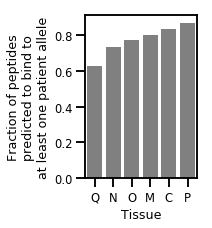

In [30]:
plt.figure(figsize=(2, 3))
sns.set_context('talk', font_scale=0.7)
sns.barplot(x='Tissue_letter', y='Percent Binding', # hue='Thresholds',
            data=perc_binding_df[perc_binding_df.Tissue_letter != 'CellLine'].sort_values('Percent Binding'), 
            
            color='Grey')
#plt.xticks(rotation=90)

plt.ylabel('Fraction of peptides\npredicted to bind to\nat least one patient allele')
plt.xlabel('Tissue')

#plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.perc_binding.bar.v20210527-214831_binding_multi_with_features_on_multi.pdf',
           bbox_inches='tight')

In [31]:
perc_binding_df[perc_binding_df.Tissue_letter != 'CellLine'].sort_values('Percent Binding')

,Tissue,Thresholds,Percent Binding,Sample,Tissue_letter
6,54147,0.1,0.627794,DNA_54147,Q
1,1183384FA1,0.1,0.730891,DNA_1183384FA1-5013,N
2,1134036FA1,0.1,0.770975,DNA_1134036FA1-5013,O
0,1070865FA1,0.1,0.800024,DNA_1070865FA1-5013,M
3,124768F,0.1,0.832383,DNA_124768F-5013,C
4,30686F,0.1,0.867366,DNA_30686F-5013,P


In [32]:
# Saving source data
panel_name = 'supp_figure_13b'
perc_binding_df[perc_binding_df.Tissue_letter != 'CellLine'].sort_values('Percent Binding')[['Tissue', 'Tissue_letter', 'Percent Binding', 'Thresholds']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

##### Plot waterfalls of peptide intensity

In [33]:
pilot_tissues = ['DNA_1070865FA1-5013']
other_tissues = [x for x in tissue_order if x not in pilot_tissues]

In [34]:
green = '#77c722'
blue = '#3864b5'

In [35]:
sample_panel_map = {'M': '14a', 'N': '14b', 'P': '14c', 'O': '15a', 'C': '15b', 'Q': '16a'}

0.8000242688994054
0.9549811916029608
0.9734255551510739
6593 7144
7870 9928
8022 11890
HLA-A32:01 999 999
HLA-A32:01 -0.0001
HLA-A68:01 1310 1310
HLA-A68:01 -0.0003
HLA-B40:01 2213 2213
HLA-B40:01 0.0032
HLA-B51:01 1232 1232
HLA-B51:01 0.0007
HLA-C03:04 651 651
HLA-C03:04 -0.001
HLA-C15:02 739 739
HLA-C15:02 0.0025


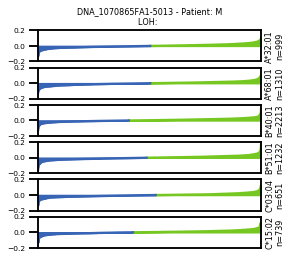


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.7308913825958078
0.917213635401228
0.9462206224857083
3452 3675
4332 5642
4469 6994
HLA-A03:01 1199 1199
HLA-A03:01 0.0118
HLA-B18:05 441 441
HLA-B18:05 -0.0077
HLA-B35:03 1379 1379
HLA-B35:03 -0.0063
HLA-C04:01 349 349
HLA-C04:01 -0.0067
HLA-C12:03 307 307
HLA-C12:03 -0.0069


<Figure size 432x288 with 0 Axes>

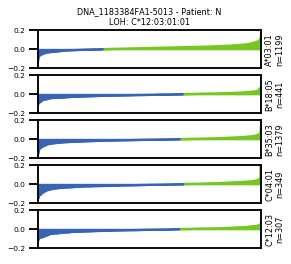


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.7709750566893424
0.9125364431486881
0.9429867184969226
2380 2942
2817 4510
2911 5433
HLA-A03:01 177 177
HLA-A03:01 -0.0062
HLA-A24:02 662 662
HLA-A24:02 0.0041
HLA-B35:02 753 753
HLA-B35:02 -0.0026
HLA-B44:02 624 624
HLA-B44:02 -0.0012
HLA-C04:01 355 355
HLA-C04:01 0.0054
HLA-C05:01 371 371
HLA-C05:01 0.0047


<Figure size 432x288 with 0 Axes>

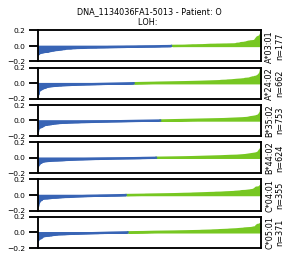


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.8323831242873432
0.9446163870337189
0.9667698322202313
5110 5266
5799 7108
5935 8964
HLA-A24:02 1486 1486
HLA-A24:02 0.0073
HLA-A25:01 1128 1128
HLA-A25:01 0.0094
HLA-B18:01 1248 1248
HLA-B18:01 -0.0008
HLA-B38:01 784 784
HLA-B38:01 -0.012
HLA-C12:03 620 620
HLA-C12:03 0.0039


<Figure size 432x288 with 0 Axes>

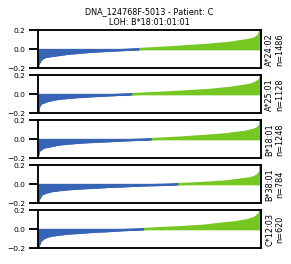


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.8673655423883319
0.9644484958979034
0.9758432087511395
3806 4384
4232 6444
4282 7976
HLA-A01:01 937 937
HLA-A01:01 0.0053
HLA-A25:01 1047 1047
HLA-A25:01 0.0019
HLA-B51:01 599 599
HLA-B51:01 -0.0004
HLA-B57:01 981 981
HLA-B57:01 0.0024
HLA-C06:02 338 338
HLA-C06:02 0.0032
HLA-C14:02 482 482
HLA-C14:02 0.0023


<Figure size 432x288 with 0 Axes>

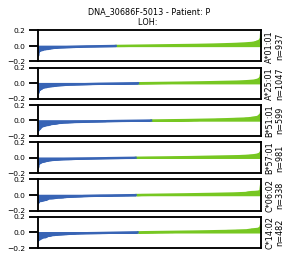


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.8211619012930249
0.9684938991076306
0.9836095428883628
4509 5209
5318 7647
5401 8961
HLA-A03:01 1615 1615
HLA-A03:01 -0.0285
HLA-B07:02 1395 1395
HLA-B07:02 -0.0002
HLA-B51:01 1805 1805
HLA-B51:01 0.0145
HLA-C07:02 144 144
HLA-C07:02 0.0224
HLA-C15:02 250 250
HLA-C15:02 0.0174


<Figure size 432x288 with 0 Axes>

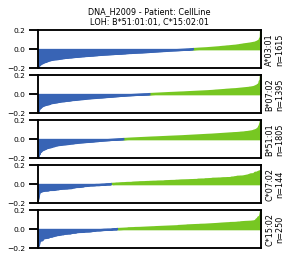


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CellLine
0.6277939747327502
0.8056365403304179
0.8406219630709426
646 774
829 1199
865 1512
HLA-A02:01 185 185
HLA-A02:01 0.0026
HLA-A03:01 172 172
HLA-A03:01 0.0026
HLA-B07:02 133 133
HLA-B07:02 -0.0033
HLA-B40:02 146 146
HLA-B40:02 -0.009
HLA-C02:02 82 82
HLA-C02:02 -0.0061
HLA-C07:02 56 56
HLA-C07:02 -0.0051


<Figure size 432x288 with 0 Axes>

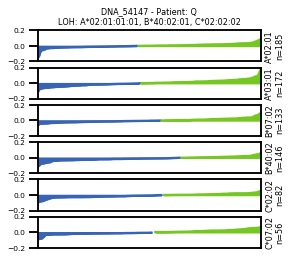


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

In [36]:
sns.set_context('talk', font_scale=0.45)

value_dictionary, loh_dictionary = {}, {}
raw_value_dictionary = {}
raw_fc_log_dictionary = {}


for i, tissue in enumerate(tissue_order):
    tissue_dictionary, raw_tissue_dictionary = {}, {}
    df = all_dfs_filtered[i]
    df['fc_log'] = df.fc.apply(np.log2)
    raw_fc_log_dictionary[tissue] = list(df.fc_log)
    normalized_cols = [x for x in df.columns if 'normalized' in x]
    
    dash_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/validation/dash_output_02/{0}/DASH.output.txt'.format(tissue),
           sep='\t')
    loh_dictionary[tissue] = ['HLA-{0}{1}:{2}'.format(x[0], x.split('*')[1].split(':')[0],  x.split(':')[1]) 
                              for x in list(dash_df[(dash_df.dash_deletion)].hla_assign_allele)]

    results_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/sherpa/sherpa_output/20210412-102418_TMT.BINDING.v20210527-214831_binding_multi_with_features_on_multi.tab',
                            sep='\t')
    results_df = results_df[results_df.source.str[11:] == tissue]
    results_df = results_df.fillna(1) # To fix SHERPA bug
    alleles = list(results_df.allele.unique())
    results_unique = results_df.sort_values('sherpa_calibrated').drop_duplicates('pepseq')

    print(len(results_unique[results_unique.sherpa_calibrated < 0.1]) / len(results_unique))
    print(len(results_unique[results_unique.sherpa_calibrated < 0.5]) / len(results_unique))
    print(len(results_unique[results_unique.sherpa_calibrated < 1]) / len(results_unique))
    
    print(len(results_df[results_df.sherpa_calibrated < 0.1].pepseq.unique()), len(results_df[results_df.sherpa_calibrated < 0.1]))
    print(len(results_df[results_df.sherpa_calibrated < 0.5].pepseq.unique()), len(results_df[results_df.sherpa_calibrated < 0.5]))
    print(len(results_df[results_df.sherpa_calibrated < 1].pepseq.unique()), len(results_df[results_df.sherpa_calibrated < 1]))
    
    green = '#77c722'
    blue = '#3864b5'

    f, axarr = plt.subplots(len(alleles), 1, sharex=True, sharey=True, figsize=(4, 4))

    for i, allele in enumerate(sorted(alleles)):
        ax = plt.subplot(len(alleles), 1, i+1)
        
        allele_peptides_all = list(set(results_df[(results_df.allele == allele)&(results_df.sherpa_calibrated < 0.1)].pepseq))
        other_allele_peptides = list(set(results_df[(results_df.allele != allele)&(results_df.sherpa_calibrated < 0.1)].pepseq))
        #allele_peptides = [x for x in allele_peptides_all if x not in other_allele_peptides]
        allele_peptides = allele_peptides_all
        
        allele_dictionary = {}
        if tissue in pilot_tissues:
            allele_dictionary['normal'] = list(df[df.Sequence.isin(allele_peptides)][normalized_cols[0]])
            allele_dictionary['tumor'] = list(df[df.Sequence.isin(allele_peptides)][normalized_cols[1]])
        else:
            allele_dictionary['normal'] = list(df[df.Sequence.isin(allele_peptides)][normalized_cols[1]])
            allele_dictionary['tumor'] = list(df[df.Sequence.isin(allele_peptides)][normalized_cols[0]])
        raw_tissue_dictionary[allele] = allele_dictionary
        
        # Creating lower bound for # of unique alleles
        if len(allele_peptides) < 50:
            allele_peptides = allele_peptides_all
            addition='*'
        else:
            addition=''
        print(allele, len(allele_peptides_all), len(allele_peptides))
        df['fc_log'] = df.fc.apply(np.log2)
        #print(allele, len(allele_peptides), len(df[df.Sequence.isin(allele_peptides)]), df[df.Sequence.isin(allele_peptides)].fc_log.median())
        #plt.figure(figsize=(10, 3))
        #(df[df.Sequence.isin(allele_peptides)].fc_log).sort_values().plot(kind='bar', ax=ax) # .sample(200)
        
        try:
        
            data = (df[df.Sequence.isin(allele_peptides)].fc_log).sort_values().reset_index().drop('index', axis=1)
            tissue_dictionary[allele] = list(data.fc_log)

            data_pos = data[data.fc_log > 0]
            data_pos.plot(kind='line', ax=ax, color=green)
            ax.fill_between(data_pos.index, data_pos.fc_log, color=green)

            data_neg = data[data.fc_log < 0]
            data_neg.plot(kind='line', ax=ax, color=blue)
            ax.fill_between(data_neg.index, data_neg.fc_log, color=blue)

            print(allele, round(data.fc_log.median(), 4))

            plt.xticks([])
            #plt.yticks([])
            plt.ylim(-0.2, 0.2)
            plt.ylabel('{0}*{1}\nn={2}{3}'.format(allele[4], allele[5:], len(allele_peptides), addition))
            ax.yaxis.set_label_position("right")
            ax.get_legend().remove()
            if i == 6:
                plt.xlabel('Allele-binding Peptides')

            if i == 0:
                plt.title('{0} - Patient: {1}\nLOH: {2}'.format(tissue,
                                                                list(sample_letter_map[sample_letter_map.Sample == tissue].Tissue_letter)[0],
                                                                ', '.join(dash_df[(dash_df.dash_deletion)].hla_assign_allele)))
            #plt.ylim(df[df.Sequence.isin(allele_peptides)].fc_log.quantile(0.01),
            #        df[df.Sequence.isin(allele_peptides)].fc_log.quantile(0.99))
            #plt.axvline()
            #plt.title('{0}, Median: {1}'.format(allele, 
            #                                    round(df[df.Sequence.isin(allele_peptides)].fc_log.median(), 4)))
            
        except:
            print('Not enough peptides')
    plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/quantitative_immunopep.waterfall.{0}.v20210527-214831_binding_multi_with_features_on_multi.pdf'.format(list(sample_letter_map[sample_letter_map.Sample == tissue].Tissue_letter)[0]))
    plt.show()
    plt.clf()
    
    try:
        data_source_df = df[['Sequence', 'fc_log']]
        data_source_df['pepseq'] = data_source_df['Sequence']
        data_source_df2 = pd.merge(results_unique[['pepseq', 'allele', 'sherpa_calibrated']],
                data_source_df[['pepseq', 'fc_log']], on='pepseq', how='inner')

        # Saving source data
        panel_name = 'supp_figure_{0}'.format(sample_panel_map[list(sample_letter_map[sample_letter_map.Sample == tissue].Tissue_letter)[0]])
        data_source_df2.to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                         index=None)
    except:
        print(list(sample_letter_map[sample_letter_map.Sample == tissue].Tissue_letter)[0])
        
    value_dictionary[tissue] = tissue_dictionary
    raw_value_dictionary[tissue] = raw_tissue_dictionary
    

In [37]:
for i, tissue in enumerate(tissue_order):
    print(tissue)

DNA_1070865FA1-5013
DNA_1183384FA1-5013
DNA_1134036FA1-5013
DNA_124768F-5013
DNA_30686F-5013
DNA_H2009
DNA_54147


In [38]:

for i, tissue in enumerate(tissue_order):
    
    patient_id = list(sample_letter_map[sample_letter_map.Sample == tissue].Tissue_letter)[0]
    print(tissue, patient_id)


    try:
        for allele in raw_value_dictionary[tissue].keys():
            print(tissue, allele, sp.ttest_rel(raw_value_dictionary[tissue][allele]['normal'],
                                         raw_value_dictionary[tissue][allele]['tumor'])[1],
                 np.median(raw_value_dictionary[tissue][allele]['normal']) - np.median(raw_value_dictionary[tissue][allele]['tumor']))
        print('\n')
    except:
        for allele in raw_value_dictionary[tissue].keys():
            print(tissue, allele, sp.ttest_rel(raw_value_dictionary[tissue][allele]['normal'],
                                         raw_value_dictionary[tissue][allele]['tumor'])[1],
                 np.median(raw_value_dictionary[tissue][allele]['normal']) - np.median(raw_value_dictionary[tissue][allele]['tumor']))
        print('\n')



DNA_1070865FA1-5013 M
DNA_1070865FA1-5013 HLA-A32:01 0.6257801800575036 -0.0033096715794602716
DNA_1070865FA1-5013 HLA-A68:01 0.12798539283881066 0.0049502504018246185
DNA_1070865FA1-5013 HLA-B40:01 7.580685747936931e-19 0.013614834265515796
DNA_1070865FA1-5013 HLA-B51:01 0.3983184942777589 -0.008038331736267779
DNA_1070865FA1-5013 HLA-C03:04 0.07810643097920204 -0.021764391059377886
DNA_1070865FA1-5013 HLA-C15:02 0.002344391542788701 0.010153825704646735


DNA_1183384FA1-5013 N
DNA_1183384FA1-5013 HLA-A03:01 3.837076873997394e-46 -0.0713007662295464
DNA_1183384FA1-5013 HLA-B18:05 3.736332154338185e-15 0.06478817370509127
DNA_1183384FA1-5013 HLA-B35:03 6.310953625740317e-30 0.053329445034647094
DNA_1183384FA1-5013 HLA-C04:01 0.0005393603099614644 0.06230257380818571
DNA_1183384FA1-5013 HLA-C12:03 1.5906281381620073e-10 0.06256778416539888


DNA_1134036FA1-5013 O
DNA_1134036FA1-5013 HLA-A03:01 0.09464461625134574 0.054606386559973075
DNA_1134036FA1-5013 HLA-A24:02 1.6099971198667077e-05

A02:01, B07:02, C02:02, C07:02

In [39]:
list(sample_letter_map[sample_letter_map.Sample == 'DNA_54147'].Tissue_letter)[0]

'Q'

Analyzing differences (control v LOH overall samples)

In [40]:
# All peptides regardless of binding
control, loh, control_tissue_lists, loh_tissue_list = [], [], [], []
for tissue in tissue_order:
    if len(loh_dictionary[tissue]) == 0:
        control.extend(raw_fc_log_dictionary[tissue])
        control_tissue_lists.extend([tissue for x in raw_fc_log_dictionary[tissue]])
    else:
        for allele in value_dictionary[tissue].keys():
            loh.extend(raw_fc_log_dictionary[tissue])
            loh_tissue_list.extend([tissue for x in raw_fc_log_dictionary[tissue]])
#sample_type_differences_df = pd.DataFrame({'Value': [abs(x) for x in control] + [abs(x) for x in loh],
sample_type_differences_df = pd.DataFrame({'Value': [x for x in control] + [x for x in loh],
            'Sample_type': ['Control' for x in control] + ['LOH' for x in loh],
            'Tissue': control_tissue_lists + loh_tissue_list})


In [41]:
# Uniquely binding peptides
control, loh, control_tissue_lists, loh_tissue_list = [], [], [], []
for tissue in tissue_order:
    if len(loh_dictionary[tissue]) == 0:
        for allele in value_dictionary[tissue].keys():
            control.extend(value_dictionary[tissue][allele])
            control_tissue_lists.extend([tissue for x in value_dictionary[tissue][allele]])
    else:
        for allele in value_dictionary[tissue].keys():
            loh.extend(value_dictionary[tissue][allele])
            loh_tissue_list.extend([tissue for x in value_dictionary[tissue][allele]])
#sample_type_differences_df = pd.DataFrame({'Value': [abs(x) for x in control] + [abs(x) for x in loh],
sample_type_differences_df = pd.DataFrame({'Value': [x for x in control] + [x for x in loh],
            'Sample_type': ['Control' for x in control] + ['LOH' for x in loh],
            'Tissue': control_tissue_lists + loh_tissue_list})


In [42]:
sample_type_differences_df['Tissue'] = sample_type_differences_df['Tissue'].str.split('_').str[1].str.split('-').str[0]


In [43]:
sample_type_differences_df.groupby('Sample_type').describe()

Value                                                    \
               count      mean       std       min       25%       50%   
Sample_type                                                              
Control      14852.0  0.001038  0.024482 -0.163618 -0.010781  0.001588   
LOH          15357.0 -0.001234  0.051316 -0.249812 -0.027518 -0.000422   

                                 
                  75%       max  
Sample_type                      
Control      0.013310  0.179460  
LOH          0.025935  0.955912

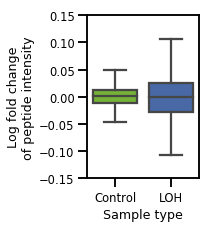

In [44]:
plt.figure(figsize=(2, 3))
sns.set_context('talk', font_scale=0.7)

sns.boxplot(x='Sample_type', y='Value', data=sample_type_differences_df, 
            fliersize=False, palette=[green, blue])
plt.ylabel('Log fold change\nof peptide intensity')
plt.xlabel('Sample type')
plt.ylim(-0.15, 0.15)
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.fold_change.box.v20210527-214831_binding_multi_with_features_on_multi.pdf',
           bbox_inches='tight')

In [45]:
std_df = sample_type_differences_df.groupby(['Tissue']).std().reset_index()
std_df['Sample Type'] = ['Control', 'LOH', 'Control', 'LOH', 'Control', 'LOH', 'LOH']

tissue_purities = []
for tissue in list(std_df.Tissue):
    tissue_purities.append(output_df[output_df['Sample'].str.contains(tissue)].purity[0])
std_df['Purity'] = tissue_purities

In [46]:
std_df = pd.merge(std_df, sample_letter_map, on='Tissue',
                 how='left')

In [47]:
std_df

,Tissue,Value,Sample Type,Purity,Sample,Tissue_letter
0,1070865FA1,0.022741,Control,0.17,DNA_1070865FA1-5013,M
1,1134036FA1,0.030253,LOH,0.11,DNA_1134036FA1-5013,O
2,1183384FA1,0.031830,Control,0.11,DNA_1183384FA1-5013,N
3,124768F,0.058536,LOH,0.23,DNA_124768F-5013,C
4,30686F,0.022871,Control,0.66,DNA_30686F-5013,P
5,54147,0.029923,LOH,0.80,DNA_54147,Q
6,H2009,0.056113,LOH,1.00,DNA_H2009,CellLine


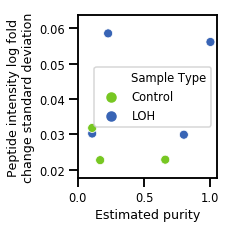

In [48]:
plt.figure(figsize=(2.5, 3))
sns.set_context('talk', font_scale=0.7)
sns.scatterplot(x='Purity', y='Value', hue='Sample Type', 
                data=std_df,
               palette=[green, blue])
plt.ylabel('Peptide intensity log fold\nchange standard deviation')
plt.xlabel('Estimated purity')
plt.xlim(0, 1.05)
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.fold_change_std.box.v20210527-214831_binding_multi_with_features_on_multi.pdf',
           bbox_inches='tight')

### Grouping by lost/retained/homozygous

In [49]:
all_tissues, all_alleles, all_peptides, all_fcs, all_loh_status = [], [], [], [], []
for i, tissue in enumerate(tissue_order):
    #print(tissue)
    tissue_dictionary, raw_tissue_dictionary = {}, {}
    df = all_dfs_filtered[i]
    df['fc_log'] = df.fc.apply(np.log2)
    raw_fc_log_dictionary[tissue] = list(df.fc_log)
    normalized_cols = [x for x in df.columns if 'normalized' in x]
    
    dash_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/output/pipeline_nextDB_08/{0}/DASH.output.txt'.format(tissue),
           sep='\t')
    loh_dictionary[tissue] = ['HLA-{0}{1}:{2}'.format(x[0], x.split('*')[1].split(':')[0],  x.split(':')[1]) 
                              for x in list(dash_df[(dash_df.dash_deletion)].hla_assign_allele)]

    results_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/sherpa/sherpa_output/20210412-102418_TMT.BINDING.v20210527-214831_binding_multi_with_features_on_multi.tab',
                            sep='\t')
    results_df = results_df[results_df.source.str[11:] == tissue]
    results_df = results_df.fillna(1) # To fix SHERPA bug
    alleles = list(results_df.allele.unique())
    unique_peptides = list(results_df.pepseq.unique())
    
    dash_df['allele'] = 'HLA-' + dash_df.hla_assign_allele.str[0] \
                    + dash_df.hla_assign_allele.str.split('*').str[1].str.split(':').str[:2].str.join(':')

    lost_alleles = list(dash_df[(dash_df.dash_deletion)].allele)
    homozygous_alleles = list(dash_df[(dash_df.dash_r == '-')].allele.unique())
    kept_alleles = [x for x in alleles if x not in (lost_alleles+homozygous_alleles)]
    
    patient_peptides_used = []
    
    for i, allele in enumerate(sorted(alleles)):
        
        allele_peptides_all = list(set(results_df[(results_df.allele == allele)&(results_df.sherpa_calibrated < 0.1)].pepseq))
        other_allele_peptides = list(set(results_df[(results_df.allele != allele)&(results_df.sherpa_calibrated < 0.1)].pepseq))
        #allele_peptides = [x for x in allele_peptides_all if x not in other_allele_peptides]
        allele_peptides = allele_peptides_all
        
        if allele in lost_alleles:
            loh_status = 'lost'
        elif allele in homozygous_alleles:
            loh_status = 'homozygous'
        else:
            loh_status = 'kept'
            
        #print(len(allele_peptides), len(list(df[df.Sequence.isin(allele_peptides)].drop_duplicates('Sequence').fc)))
        
        all_tissues.extend([tissue for x in allele_peptides])
        all_alleles.extend([allele for x in allele_peptides])
        all_peptides.extend(allele_peptides)
        all_fcs.extend(list(df[df.Sequence.isin(allele_peptides)].drop_duplicates('Sequence').fc))
        all_loh_status.extend([loh_status for x in allele_peptides])
        patient_peptides_used.extend(allele_peptides)
        
    unused_peptides = [x for x in unique_peptides if x not in patient_peptides_used]
    print(tissue, len(unused_peptides))
    
 

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


DNA_1070865FA1-5013 1648
DNA_1183384FA1-5013 1271
DNA_1134036FA1-5013 707
DNA_124768F-5013 1029
DNA_30686F-5013 582
DNA_H2009 982
DNA_54147 383


In [50]:
len(all_tissues), len(all_alleles), len(all_fcs)

(29394, 29394, 29394)

In [51]:
sample_letter_map

,Sample,Tissue,Tissue_letter
0,DNA_1070865FA1-5013,1070865FA1,M
1,DNA_1183384FA1-5013,1183384FA1,N
2,DNA_1134036FA1-5013,1134036FA1,O
3,DNA_124768F-5013,124768F,C
4,DNA_30686F-5013,30686F,P
5,DNA_H2009,H2009,CellLine
6,DNA_54147,54147,Q


In [52]:
plotting_df = pd.DataFrame({'Sample': all_tissues,
                             'Allele': all_alleles,
                             'Peptide': all_peptides,
                             'Fold_change': all_fcs,
                             'Allele_status': all_loh_status})

In [53]:
plotting_df = pd.merge(plotting_df, sample_letter_map,
                      on='Sample', how='left')

In [54]:
plotting_df.Sample.unique()

array(['DNA_1070865FA1-5013', 'DNA_1183384FA1-5013',
       'DNA_1134036FA1-5013', 'DNA_124768F-5013', 'DNA_30686F-5013',
       'DNA_H2009', 'DNA_54147'], dtype=object)

In [55]:
plotting_df['Gene'] = plotting_df.Allele.str[4]

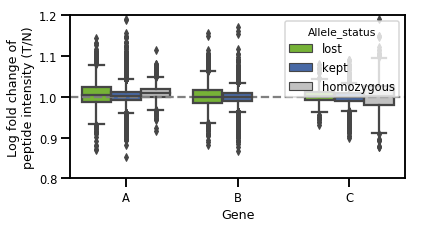

In [56]:
plt.figure(figsize=(6, 3))
sns.set_context('talk', font_scale=0.7)

plt.axhline(y=1.0, ls='--', color='grey')

sns.boxplot(x='Gene', y='Fold_change', hue='Allele_status',
            data=plotting_df[plotting_df.Sample != 'DNA_H2009'], 
           hue_order=['lost', 'kept', 'homozygous'], 
            palette=[green, blue, '#C1C1C1'])
plt.ylim(0.8, 1.2)

plt.ylabel('Log fold change of\npeptide intensity (T/N)')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.fold_change_by_gene.box.v20210527-214831_binding_multi_with_features_on_multi.pdf',
           bbox_inches='tight')

In [57]:
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'lost')].Fold_change.median())
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'kept')].Fold_change.median())
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'homozygous')].Fold_change.median())
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'B')&(plotting_df.Allele_status == 'lost')].Fold_change.median())
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'B')&(plotting_df.Allele_status == 'kept')].Fold_change.median())
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'lost')].Fold_change.median())
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'kept')].Fold_change.median())
print(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'homozygous')].Fold_change.median())


1.0033057912375845
1.001742097044902
0.9986036751693899
1.0028262896392433
0.9995741538948473
1.0043294231497386
1.0003827331268196
1.002694116113333


In [58]:
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'lost')].Fold_change))
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'kept')].Fold_change))
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'homozygous')].Fold_change))
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'B')&(plotting_df.Allele_status == 'lost')].Fold_change))
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'B')&(plotting_df.Allele_status == 'kept')].Fold_change))
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'lost')].Fold_change))
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'kept')].Fold_change))
print(len(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'homozygous')].Fold_change))


1490
6613
2814
3823
9910
703
3421
620


In [59]:
# Saving source data
panel_name = 'figure_4b'
plotting_df.to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

In [60]:
plotting_df.Sample.unique()

array(['DNA_1070865FA1-5013', 'DNA_1183384FA1-5013',
       'DNA_1134036FA1-5013', 'DNA_124768F-5013', 'DNA_30686F-5013',
       'DNA_H2009', 'DNA_54147'], dtype=object)

In [61]:
print(sp.ttest_ind(list(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'lost')].Fold_change),
            list(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'kept')].Fold_change)))
print(sp.ttest_ind(list(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'lost')].Fold_change),
            list(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'homozygous')].Fold_change)))
print(sp.ttest_ind(list(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'homozygous')].Fold_change),
            list(plotting_df[(plotting_df.Tissue != 'DNA_H2009')&(plotting_df.Gene == 'A')&(plotting_df.Allele_status == 'kept')].Fold_change)))

Ttest_indResult(statistic=5.230219529302309, pvalue=1.735433739888566e-07)
Ttest_indResult(statistic=12.5089149215903, pvalue=2.7251219803680937e-35)
Ttest_indResult(statistic=-15.708932694960763, pvalue=6.5102617998152656e-55)


In [62]:
sp.ttest_ind(list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'B')&(plotting_df.Allele_status == 'lost')].Fold_change),
            list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'B')&(plotting_df.Allele_status == 'kept')].Fold_change))


Ttest_indResult(statistic=4.942822555156334, pvalue=7.818585140602015e-07)

In [63]:
print(sp.ttest_ind(list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'lost')].Fold_change),
            list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'kept')].Fold_change)))
print(sp.ttest_ind(list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'lost')].Fold_change),
            list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'homozygous')].Fold_change)))
print(sp.ttest_ind(list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'homozygous')].Fold_change),
            list(plotting_df[(plotting_df.Sample != 'DNA_H2009')&(plotting_df.Gene == 'C')&(plotting_df.Allele_status == 'kept')].Fold_change)))


Ttest_indResult(statistic=2.6650550866023797, pvalue=0.007730749002638656)
Ttest_indResult(statistic=-1.3736399186282133, pvalue=0.16984094633851862)
Ttest_indResult(statistic=5.048211363276875, pvalue=4.6636018738804977e-07)


In [64]:
std_df

,Tissue,Value,Sample Type,Purity,Sample,Tissue_letter
0,1070865FA1,0.022741,Control,0.17,DNA_1070865FA1-5013,M
1,1134036FA1,0.030253,LOH,0.11,DNA_1134036FA1-5013,O
2,1183384FA1,0.031830,Control,0.11,DNA_1183384FA1-5013,N
3,124768F,0.058536,LOH,0.23,DNA_124768F-5013,C
4,30686F,0.022871,Control,0.66,DNA_30686F-5013,P
5,54147,0.029923,LOH,0.80,DNA_54147,Q
6,H2009,0.056113,LOH,1.00,DNA_H2009,CellLine


In [65]:
plotting_df.head()

,Sample,Allele,Peptide,Fold_change,Allele_status,Tissue,Tissue_letter,Gene
0,DNA_1070865FA1-5013,HLA-A32:01,RTFVWPAHF,1.024423,kept,1070865FA1,M,A
1,DNA_1070865FA1-5013,HLA-A32:01,KTWNGGESL,0.996553,kept,1070865FA1,M,A
2,DNA_1070865FA1-5013,HLA-A32:01,RVAEVQQVL,1.036950,kept,1070865FA1,M,A
3,DNA_1070865FA1-5013,HLA-A32:01,KLYGYYVSI,0.962393,kept,1070865FA1,M,A
4,DNA_1070865FA1-5013,HLA-A32:01,KLYGMPTDFGF,1.034859,kept,1070865FA1,M,A


In [66]:
for sample in list(std_df.sort_values(['Sample Type', 'Purity']).Tissue_letter)[:-1]:
    print(sample)
    print(sp.ttest_ind(list(plotting_df[(plotting_df.Tissue_letter == sample)&(plotting_df.Allele_status == 'lost')].Fold_change),
                list(plotting_df[(plotting_df.Tissue_letter == sample)&(plotting_df.Allele_status == 'kept')].Fold_change)))
    print(sp.ttest_ind(list(plotting_df[(plotting_df.Tissue_letter == sample)&(plotting_df.Allele_status == 'lost')].Fold_change),
                list(plotting_df[(plotting_df.Tissue_letter == sample)&(plotting_df.Allele_status == 'homozygous')].Fold_change)))
    print(sp.ttest_ind(list(plotting_df[(plotting_df.Tissue_letter == sample)&(plotting_df.Allele_status == 'homozygous')].Fold_change),
                list(plotting_df[(plotting_df.Tissue_letter == sample)&(plotting_df.Allele_status == 'kept')].Fold_change)))
    print('\n')
    

N
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=17.502659534066296, pvalue=6.05512326205511e-66)


M
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


P
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


O
Ttest_indResult(statistic=-1.5267262311266496, pvalue=0.1269366691931721)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


C
Ttest_indResult(statistic=2.888084376367354, pvalue=0.003893875821163801)
Ttest_indResult(statistic=0.4615730763857842, pvalue=0.644421037942891)
Ttest_indResult(statistic=1.527864381498058, pvalue=0.12665572284634005)


Q
Ttest_indResult(statistic=-2.7971801204228814, pvalue=0.005283372854117176)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)




In [67]:
plotting_df.groupby(['Sample', 'Allele_status']).median()

Fold_change
Sample              Allele_status             
DNA_1070865FA1-5013 kept              1.000908
DNA_1134036FA1-5013 kept              1.001027
                    lost              1.000109
DNA_1183384FA1-5013 homozygous        1.008255
                    kept              0.995403
DNA_124768F-5013    homozygous        1.002694
                    kept              0.999187
                    lost              1.002621
DNA_30686F-5013     kept              1.001858
DNA_54147           kept              1.000423
                    lost              0.998259
DNA_H2009           homozygous        0.980395
                    kept              1.001705
                    lost              1.009894

In [68]:
plotting_df.groupby(['Gene', 'Allele_status']).median()

Fold_change
Gene Allele_status             
A    homozygous        0.998604
     kept              1.001742
     lost              1.003306
B    kept              0.999574
     lost              1.002826
C    homozygous        1.002694
     kept              1.000383
     lost              1.004329

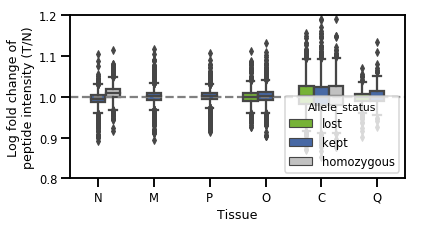

In [69]:
plt.figure(figsize=(6, 3))
sns.set_context('talk', font_scale=0.7)

plt.axhline(y=1.0, ls='--', color='grey')
sns.boxplot(x='Tissue_letter', y='Fold_change', hue='Allele_status',
            data=plotting_df[(plotting_df.Sample != 'DNA_H2009')], 
           hue_order=['lost', 'kept', 'homozygous'],
            order=list(std_df.sort_values(['Sample Type', 'Purity']).Tissue_letter)[:-1],
           palette=[green, blue, '#C1C1C1'])
plt.ylim(0.8, 1.2)
#plt.xticks(rotation=90)
plt.xlabel('Tissue')
plt.ylabel('Log fold change of\npeptide intensity (T/N)')

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.fold_change_by_patient.box.v20210527-214831_binding_multi_with_features_on_multi.pdf',
           bbox_inches='tight')

In [70]:
# Saving source data
panel_name = 'supp_figure_13c'
plotting_df.to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

In [71]:
sp.ttest_ind(list(plotting_df[(plotting_df.Sample == 'DNA_H2009')&(plotting_df.Allele_status == 'lost')].Fold_change),
            list(plotting_df[(plotting_df.Sample == 'DNA_H2009')&(plotting_df.Allele_status == 'kept')].Fold_change))


Ttest_indResult(statistic=6.762096224285851, pvalue=1.5810949841355312e-11)

In [72]:
plotting_df[(plotting_df.Sample == 'DNA_H2009')].groupby('Allele_status').median()


,Fold_change
Allele_status,
homozygous,0.980395
kept,1.001705
lost,1.009894


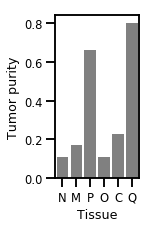

In [73]:
plt.figure(figsize=(1.5, 3))
sns.set_context('talk', font_scale=0.7)
sns.barplot(x='Tissue_letter', y='Purity', # hue='Thresholds',
            data=std_df[std_df.Tissue_letter != 'CellLine'], 
            order=list(std_df.sort_values(['Sample Type', 'Purity']).Tissue_letter)[:-1],
            color='Grey')

plt.ylabel('Tumor purity')
plt.xlabel('Tissue')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.tumor_purity.bar.pdf',
           bbox_inches='tight')

In [74]:
std_df[std_df.Tissue_letter != 'CellLine'][['Tissue', 'Tissue_letter', 'Purity']]

,Tissue,Tissue_letter,Purity
0,1070865FA1,M,0.17
1,1134036FA1,O,0.11
2,1183384FA1,N,0.11
3,124768F,C,0.23
4,30686F,P,0.66
5,54147,Q,0.80


In [75]:
# Saving source data
panel_name = 'supp_figure_13d'
std_df[std_df.Tissue_letter != 'CellLine'][['Tissue', 'Tissue_letter', 'Purity']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)

### Allele-specific expression

In [76]:
input_meta_data = pd.read_csv('/rnd/users/rpyke/data/00-DASH/for_others/readdata.immunopeptidomics.csv')

In [77]:
def get_lees_abbreviation(x):
    if '/per/ops/symp' in x:
        return '_'.join(x.split('ops/symphony/production/')[1].split('/')[:3])
    else:
        return '_'.join(x.split('/')[4:7])
input_meta_data['subject'] = input_meta_data.rna_home.apply(get_lees_abbreviation)

In [78]:
input_meta_data = input_meta_data.replace('2191_27541_1946180', '2192_27541_1946180')

In [79]:
allele_specific_exp_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/validation/TMT/kallisto.from_Lee.csv')

In [80]:
allele_specific_exp_df = pd.merge(allele_specific_exp_df, input_meta_data[['subject', 'sample_name_tumor']],
                                on='subject', how='left')

In [81]:
allele_specific_exp_df['Sample'] = allele_specific_exp_df['sample_name_tumor']

In [82]:
def allele_reformat(x):
    return 'HLA-{0}{1}'.format(x[0], x[2:7])
allele_specific_exp_df['Allele'] = allele_specific_exp_df['allele'].apply(allele_reformat)

In [83]:
allele_specific_exp_df_merged = pd.merge(allele_specific_exp_df, 
                                         plotting_df[['Sample', 'Allele', 'Allele_status']].drop_duplicates(),
                                    on=['Sample', 'Allele'], how='inner')

In [84]:
allele_specific_exp_df_merged = pd.merge(allele_specific_exp_df_merged, sample_letter_map,
        on='Sample', how='left')

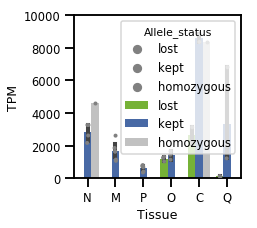

In [85]:
plt.figure(figsize=(3, 3))
sns.set_context('talk', font_scale=0.7)

g = sns.barplot(x='Tissue_letter', y='tpm', hue='Allele_status',
            data=allele_specific_exp_df_merged,
            hue_order=['lost', 'kept', 'homozygous'],
            palette=[green, blue, '#C1C1C1'],
           order=list(std_df.sort_values(['Sample Type', 'Purity']).Tissue_letter)[:-1])
sns.stripplot(x='Tissue_letter', y='tpm', hue='Allele_status',
            data=allele_specific_exp_df_merged,
            hue_order=['lost', 'kept', 'homozygous'],
            palette=['grey', 'grey', 'grey'], dodge=True, size=4,
           order=list(std_df.sort_values(['Sample Type', 'Purity']).Tissue_letter)[:-1])
#g.set_yscale("log")
plt.ylabel('TPM')
plt.xlabel('Tissue')
plt.ylim(0, 10000)

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/immunopep.AS_exp_by_patient.box.pdf',
           bbox_inches='tight')

In [86]:
# Saving source data
panel_name = 'supp_figure_13e'
allele_specific_exp_df_merged[['Tissue', 'Tissue_letter', 'Allele', 'Allele_status', 'tpm']].to_excel('/rnd/users/rpyke/data/00-DASH/manuscript_source_data/{0}.xlsx'.format(panel_name),
                                 index=None)